2023-07-21 15:12:19.866581: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50


2023-07-21 15:13:22.960659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


980/980 [==============================] - 44s 44ms/step - loss: 2.0064 - accuracy: 0.4190 - val_loss: 0.7458 - val_accuracy: 0.7516
Epoch 2/50
980/980 [==============================] - 46s 46ms/step - loss: 0.8161 - accuracy: 0.7445 - val_loss: 0.3510 - val_accuracy: 0.8938
Epoch 3/50
980/980 [==============================] - 48s 49ms/step - loss: 0.4858 - accuracy: 0.8485 - val_loss: 0.1678 - val_accuracy: 0.9563
Epoch 4/50
980/980 [==============================] - 50s 51ms/step - loss: 0.3252 - accuracy: 0.9020 - val_loss: 0.0994 - val_accuracy: 0.9741
Epoch 5/50
980/980 [==============================] - 49s 50ms/step - loss: 0.2504 - accuracy: 0.9254 - val_loss: 0.0839 - val_accuracy: 0.9788
Epoch 6/50
980/980 [==============================] - 50s 51ms/step - loss: 0.2001 - accuracy: 0.9385 - val_loss: 0.0623 - val_accuracy: 0.9823
Epoch 7/50
980/980 [==============================] - 51s 52ms/step - loss: 0.1667 - accuracy: 0.9493 - val_loss: 0.0604 - val_accuracy: 0.9816
Epo

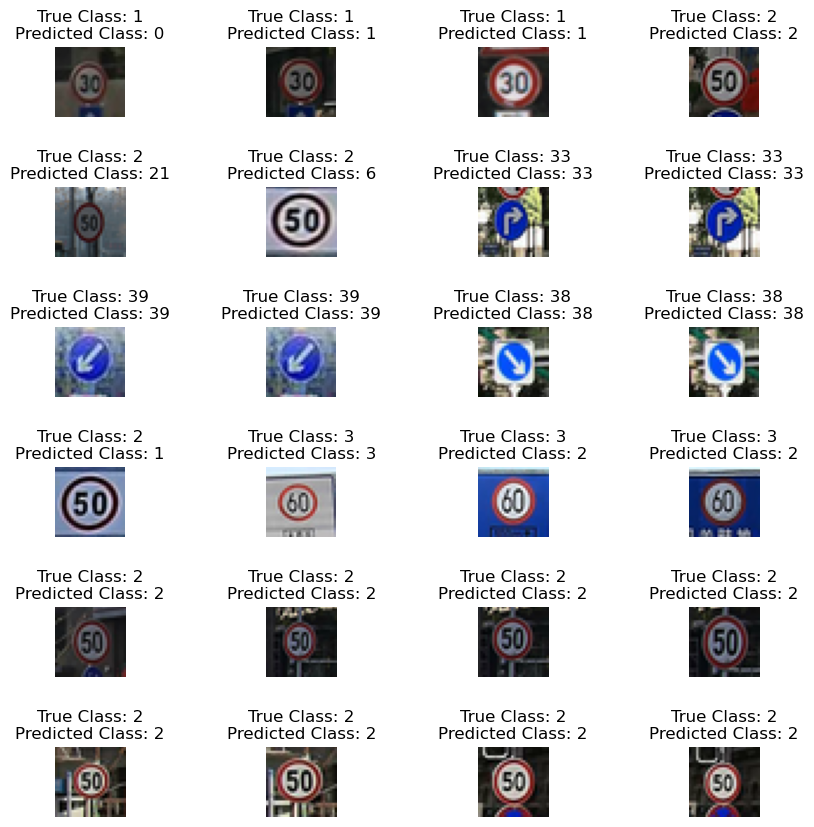

Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  4 105   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   9 135   0   0   0   5   0   0   0   0   0   0   0  10   0   0   0
    0   0   0   0]
 [  0   0  20  76   0  10   6   0   6   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  6   3   0   1  41   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [ 13   4   0   0   0  35   0   0   0   0   0   0   0   0   0   2   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   3   0   

In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Përcaktimi i shtegut të dataset-it
dataset_path = 'gtsrb-dataset'

# Ngarkimi i skedarëve CSV
train_data = pd.read_csv(os.path.join(dataset_path, 'Train.csv'))
test_data = pd.read_csv(os.path.join(dataset_path, 'Test_Images.csv'))
meta_data = pd.read_csv(os.path.join(dataset_path, 'Meta.csv'))

# Ngarkimi dhe paraprocesimi i një imazhi të vetëm
def preprocess_image(image_path, class_id):
    image = Image.open(image_path)
    image = image.resize((30, 30))  # Ndryshimi i përmasave të imazhit në (30, 30)
    if image.mode != "RGB":
        image = image.convert("RGB")  # Konvertimi i imazheve të shkallës gri në RGB
    image_array = np.array(image)
    if len(image_array.shape) == 2:  # Trajtimi i imazheve të shkallës gri
        image_array = np.stack((image_array,) * 3, axis=-1)
    image_array = image_array / 255.0  # Normalizimi i imazheve
    return image_array, class_id

# Ngarkimi dhe paraprocesimi i imazheve të trajnimit
train_images = []
train_labels = []
for i, row in train_data.iterrows():
    image_path = os.path.join(dataset_path, row['Path'])
    image, class_id = preprocess_image(image_path, row['ClassId'])
    train_images.append(image)
    train_labels.append(class_id)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Kryerja e kodimit one-hot në etiketat e trajnimit
label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(train_labels)

# Ndarja e të dhënave të trajnimit në pjesën e trajnimit dhe validimit
train_images, valid_images, train_labels, valid_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=123)

# Ngarkimi dhe paraprocesimi i imazheve të testimit
test_images = []
test_labels = []
for i, row in test_data.iterrows():
    image_path = os.path.join(dataset_path, row['Path'])
    image, class_id = preprocess_image(image_path, row['ClassId'])
    test_images.append(image)
    test_labels.append(class_id)

# Konvertimi i imazheve testuese në varg NumPy
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Krijimi i modelit të rrjetit konvolucional
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(43, activation='softmax')
])

# Kompilimi i modelit
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Përcaktimi i konfigurimit të shtimit të të dhënave
data_augmentation = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

# Përcaktimi i orarit të normës së mësimit
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9
)

# Përcaktimi i ndalesës së hershme
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Trajnimi i modelit me shtim të të dhënave dhe orarin e normës së mësimit
model.fit(data_augmentation.flow(train_images, train_labels, batch_size=32),
          epochs=50,
          steps_per_epoch=len(train_images) // 32,
          validation_data=(valid_images, valid_labels),
          verbose=1)


# Konvertimi i etiketave testuese në formatin one-hot
test_labels = label_binarizer.transform(test_labels)

# Evaluimi i modelit në setin e trajnimit
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Parashikimet mbi imazhet e testimit
predictions = model.predict(test_images)

# Konvertimi i parashikimeve në etiketa të klasave
predicted_labels = np.argmax(predictions, axis=1)

# Konvertimi i etiketave të testimit të koduara me one-hot në etiketat e tyre origjinale të klasave
true_labels = np.argmax(test_labels, axis=1)

# Shfaqja e imazheve të testimit të klasifikuara
fig, axes = plt.subplots(6, 4, figsize=(10, 10))
axes = axes.ravel()

for i in range(24):
    axes[i].imshow(test_images[i])
    axes[i].set_title(f"True Class: {true_labels[i]}\nPredicted Class: {predicted_labels[i]}")
    axes[i].axis('off')

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

# Llogaritja e matricës së konfuzionit
cm = confusion_matrix(np.argmax(test_labels, axis=1), predicted_labels)

print("Confusion Matrix:")
print(cm)
